# Kuntadatan tutkimista 2

Tilastokeskuksesta Suomen kuntien tietoja

Kysymyksiä:

- Mikä on pääkaupunkiseudun väestön määrä?
- Mikä on pienin kunta?
- Missä on suurin työllisyysaste?
- Missä on pienin työllisyysaste?

In [37]:
import pandas as pd

In [38]:
df = pd.read_excel('Kunnat2.xlsx', header=None, skiprows=3, names=('Nimi', 'Tieto', 'Luku'))
df.head()

,Nimi,Tieto,Luku
0,Akaa,Väkiluku,16769.0
1,NaN,"Väkiluvun muutos edellisestä vuodesta, %",-0.9
2,NaN,"Työllisyysaste, %",71.9
3,NaN,Taloudellinen huoltosuhde,144.7
4,Alajärvi,Väkiluku,9831.0


In [39]:
df.tail(10)

,Nimi,Tieto,Luku
1636,NaN,NaN,NaN
1637,NaN,NaN,NaN
1638,NaN,NaN,NaN
1639,NaN,NaN,NaN
1640,NaN,NaN,NaN
1641,NaN,NaN,NaN
1642,NaN,NaN,NaN
1643,NaN,NaN,NaN
1644,Sisäinen viitekoodi:,NaN,NaN
1645,Kuntien avainluvut,NaN,NaN


## Siivotaan vähän

In [40]:
# kokonaan tyhjät rivit pois

df.dropna(how='all', inplace=True)
df.tail(10)

,Nimi,Tieto,Luku
1623,20190617 09:10,NaN,NaN
1625,Lähde:,NaN,NaN
1626,Tilastokeskus,NaN,NaN
1628,Yhteystiedot:,NaN,NaN
1629,Tilastokeskus,NaN,NaN
1631,Tekijänoikeus,NaN,NaN
1633,Yksikkö:,NaN,NaN
1634,Indikaattori,NaN,NaN
1644,Sisäinen viitekoodi:,NaN,NaN
1645,Kuntien avainluvut,NaN,NaN


In [41]:
# poistetaan rivit, joilla ei ole vähintään kahta tietoa

df.dropna(thresh=2, inplace=True)
df.tail(10)

,Nimi,Tieto,Luku
1590,NaN,"Työllisyysaste, %",80.6
1591,NaN,Taloudellinen huoltosuhde,101.8
1592,Ålands landsbygd,Väkiluku,15756.0
1593,NaN,"Väkiluvun muutos edellisestä vuodesta, %",1.5
1594,NaN,"Työllisyysaste, %",85.0
1595,NaN,Taloudellinen huoltosuhde,96.5
1596,Ålands skärgård,Väkiluku,2056.0
1597,NaN,"Väkiluvun muutos edellisestä vuodesta, %",-3.1
1598,NaN,"Työllisyysaste, %",82.7
1599,NaN,Taloudellinen huoltosuhde,118.7


In [42]:
# täytetään ensimmäiseen sarakkeeseen na-arvot kopioimalla tyhjiin kohtiin edellinen arvo

df.fillna(method='ffill', inplace=True)
df.head(10)

,Nimi,Tieto,Luku
0,Akaa,Väkiluku,16769.0
1,Akaa,"Väkiluvun muutos edellisestä vuodesta, %",-0.9
2,Akaa,"Työllisyysaste, %",71.9
3,Akaa,Taloudellinen huoltosuhde,144.7
4,Alajärvi,Väkiluku,9831.0
5,Alajärvi,"Väkiluvun muutos edellisestä vuodesta, %",-0.7
6,Alajärvi,"Työllisyysaste, %",67.7
7,Alajärvi,Taloudellinen huoltosuhde,180.2
8,Alavieska,Väkiluku,2610.0
9,Alavieska,"Väkiluvun muutos edellisestä vuodesta, %",-1.1


In [44]:
# Äänekoski on viimeinen kunta ennen maakuntia. Etsitään sen indeksi.

df[df['Nimi'] == 'Äänekoski']

,Nimi,Tieto,Luku
1240,Äänekoski,Väkiluku,19144.0
1241,Äänekoski,"Väkiluvun muutos edellisestä vuodesta, %",-1.2
1242,Äänekoski,"Työllisyysaste, %",65.2
1243,Äänekoski,Taloudellinen huoltosuhde,179.9


In [58]:
# erotetaan kunnat omaksi rakenteekseen

kunnat = df.iloc[0:1244]
kunnat.tail()

,Nimi,Tieto,Luku
1239,Ähtäri,Taloudellinen huoltosuhde,172.7
1240,Äänekoski,Väkiluku,19144.0
1241,Äänekoski,"Väkiluvun muutos edellisestä vuodesta, %",-1.2
1242,Äänekoski,"Työllisyysaste, %",65.2
1243,Äänekoski,Taloudellinen huoltosuhde,179.9


In [59]:
kunnat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1243
Data columns (total 3 columns):
Nimi     1244 non-null object
Tieto    1244 non-null object
Luku     1244 non-null float64
dtypes: float64(1), object(2)
memory usage: 38.9+ KB


## Vastataan alussa esitettyihin kysymyksiin

In [60]:
# pääkaupunkiseudun (Helsinki, Espoo, Vantaa, Kauniainen) väkiluku

paakaupunkiseutu_vakiluku = df[(df['Tieto'] == 'Väkiluku') & ((df['Nimi'] == 'Helsinki') | (df['Nimi'] == 'Espoo') | (df['Nimi'] == 'Vantaa') | (df['Nimi'] == 'Kauniainen'))]['Luku'].sum()
paakaupunkiseutu_vakiluku

1154967.0

In [74]:
# käännetään tiedot toisin päin, jotta niitä on helpompi käsitellä: pivot

new_df = df.pivot(index='Nimi', columns='Tieto')

In [75]:
new_df

Luku                    \
Tieto                        Taloudellinen huoltosuhde Työllisyysaste, %   
Nimi                                                                       
Ahvenanmaa                                       100.0              83.1   
Akaa                                             144.7              71.9   
Alajärvi                                         180.2              67.7   
Alavieska                                        160.0              71.5   
Alavus                                           169.0              69.5   
...                                                ...               ...   
Äänekosken seutukunta                            179.7              65.6   
Äänekoski                                        179.9              65.2   
Åboland-Turunmaan seutukunta                     147.3              74.5   
Ålands landsbygd                                  96.5              85.0   
Ålands skärgård                                  118.7              82.7   

                                                                                
Tieto                        Väkiluku Väkiluvun muutos edellisestä vuodesta, %  
Nimi                                                                            
Ahvenanmaa                    29489.0                                      0.9  
Akaa                          16769.0                                     -0.9  
Alajärvi                       9831.0                                     -0.7  
Alavieska                      2610.0                                     -1.1  
Alavus                        11713.0                                     -1.6  
...                               ...                                      ...  
Äänekosken seutukunta         21892.0                                     -1.1  
Äänekoski                     19144.0                                     -1.2  
Åboland-Turunmaan seutukunta  22078.0                                     -0.9  
Ålands landsbygd              15756.0                                      1.5  
Ålands skärgård                2056.0                                     -3.1  

[400 rows x 4 columns]

In [87]:
# pienin kunta

new_df[new_df[('Luku', 'Väkiluku')] == new_df[('Luku', 'Väkiluku')].min()]

Luku                             \
Tieto    Taloudellinen huoltosuhde Työllisyysaste, % Väkiluku   
Nimi                                                            
Sottunga                     109.1              78.8     92.0   

                                                   
Tieto    Väkiluvun muutos edellisestä vuodesta, %  
Nimi                                               
Sottunga                                     -4.2

In [88]:
# suurin työllisyysaste

new_df[new_df[('Luku', 'Työllisyysaste, %')] == new_df[('Luku', 'Työllisyysaste, %')].max()]

Luku                             \
Tieto  Taloudellinen huoltosuhde Työllisyysaste, % Väkiluku   
Nimi                                                          
Jomala                      87.5              87.2   4859.0   

                                                 
Tieto  Väkiluvun muutos edellisestä vuodesta, %  
Nimi                                             
Jomala                                      2.1

In [89]:
# pienin työllisyysaste

new_df[new_df[('Luku', 'Työllisyysaste, %')] == new_df[('Luku', 'Työllisyysaste, %')].min()]

Luku                             \
Tieto    Taloudellinen huoltosuhde Työllisyysaste, % Väkiluku   
Nimi                                                            
Puolanka                     236.6              56.1   2669.0   

                                                   
Tieto    Väkiluvun muutos edellisestä vuodesta, %  
Nimi                                               
Puolanka                                     -2.4

Text(0, 0.5, 'Väkiluvun muutos')

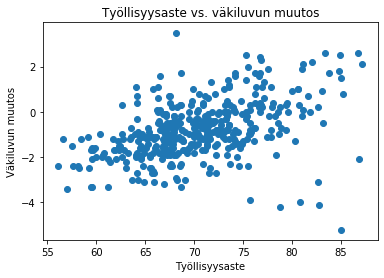

In [92]:
# kaavioon työllisyysaste vs. väkiluvun muutos

import matplotlib.pyplot as plt
import numpy as np

x = new_df[('Luku', 'Työllisyysaste, %')]
y = new_df[('Luku', 'Väkiluvun muutos edellisestä vuodesta, %')]
plt.scatter(x,y)

plt.title("Työllisyysaste vs. väkiluvun muutos")
plt.xlabel("Työllisyysaste")
plt.ylabel("Väkiluvun muutos")